ECON 5140 - HOMEWORK 1
Part A: Generalized Linear Models
Part B: Time Series Decomposition

DATASET 1: Customer Purchase Behavior
Number of customers: 1000
Purchase rate: 90.00%

First 5 rows:
         Age     Income  TimeOnSite  Purchase
0  39.967142  70.990332    2.814421         1
1  33.617357  63.869505    4.460907         1
2  41.476885  50.894456    0.667441         1
3  50.230299  40.295948    5.872412         1
4  32.658466  60.473350    8.012511         1

DATASET 2: E-commerce Daily Sales
Date range: 2024-01-01 to 2025-12-31
Number of days: 731

Sales Statistics:
count     731.000000
mean     3513.075089
std      1971.539442
min      1061.751531
25%      1586.286522
50%      3307.941481
75%      4941.486536
max      8342.638282
Name: Sales, dtype: float64

PART A: GENERALIZED LINEAR MODELS

----------------------------------------------------------------------
A1: Exploratory Data Analysis
----------------------------------------------------------------------


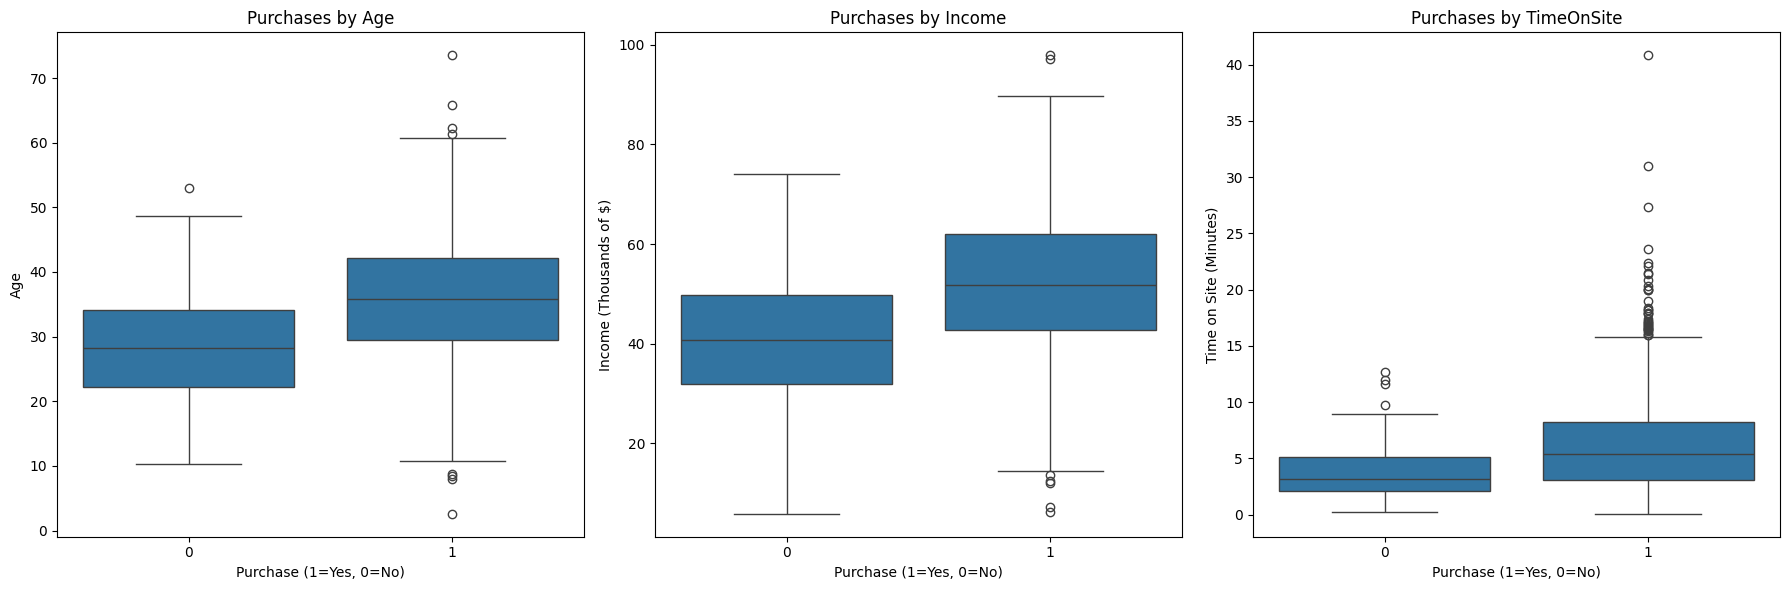

Mean Values
                Age     Income  TimeOnSite
Purchase                                  
0         28.673571  40.152509    3.925442
1         35.917737  52.274770    6.340959
Correlation Matrix


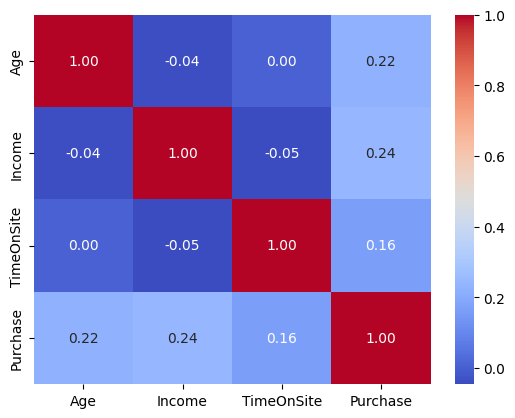


----------------------------------------------------------------------
A2: Linear Probability Model
----------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     55.67
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           2.86e-33
Time:                        23:59:18   Log-Likelihood:                -137.46
No. Observations:                1000   AIC:                             282.9
Df Residuals:                     996   BIC:                             302.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err      

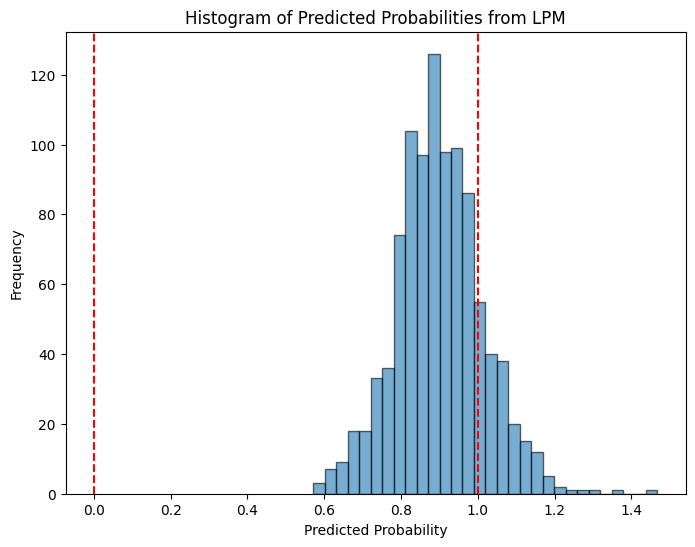


----------------------------------------------------------------------
A3: Logistic Regression
----------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.238157
         Iterations 8
Logistic Regression Summary
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Thu, 29 Jan 2026   Pseudo R-squ.:                  0.2674
Time:                        23:59:18   Log-Likelihood:                -238.16
converged:                       True   LL-Null:                       -325.08
Covariance Type:            nonrobust   LLR p-value:                 1.874e-37
                 coef    std err          z      P>|z|      [0.025     

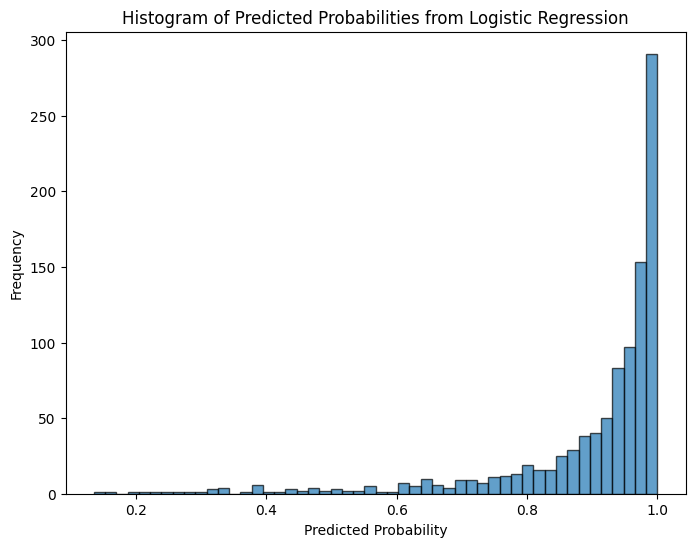


----------------------------------------------------------------------
A4: Predictions for New Customers
----------------------------------------------------------------------
New Customer Predictions
 const  Age  Income  TimeOnSite  Predicted Probability  Predicted Purchase
   1.0   25      30           2               0.371500                   0
   1.0   35      50           5               0.942887                   1
   1.0   45      70           8               0.997836                   1
   1.0   55      90          10               0.999898                   1
The most likely customer to purchase is the 55 year old with an income of 90 and a time on sight of 10.  They have the highest of each attributes which we showed to all be positive for purchases in the previous regression analysis

PART B: TIME SERIES ANALYSIS

----------------------------------------------------------------------
B1: Time Series Visualization
------------------------------------------------------------

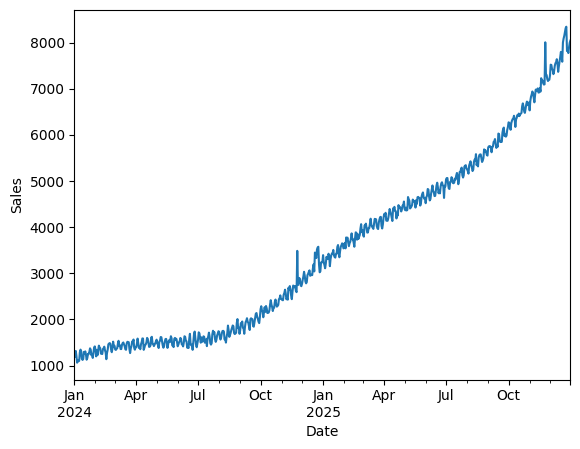

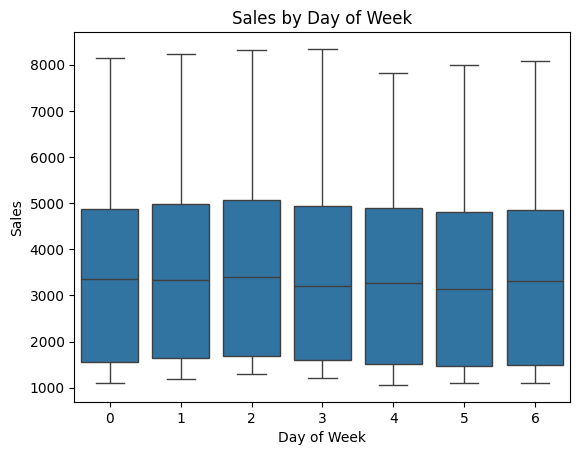

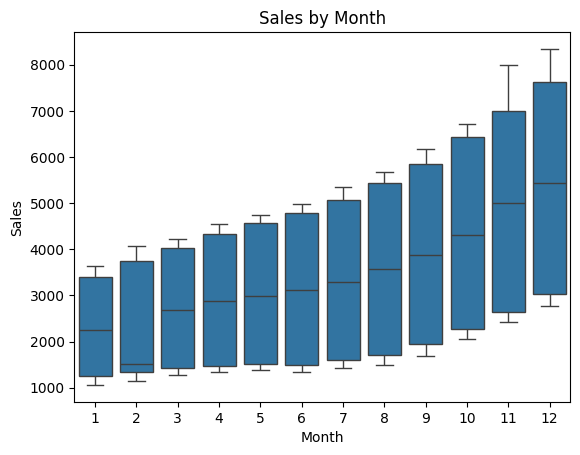

Mean Sales by Day of Week: DayOfWeek
0    3519.215953
1    3589.052396
2    3627.394430
3    3535.594781
4    3453.204115
5    3412.415879
6    3452.759246
Name: Sales, dtype: float64
Mean Sales by Month: Month
1     2318.589573
2     2534.425148
3     2732.951942
4     2901.430048
5     3027.989448
6     3144.380483
7     3342.999798
8     3581.537558
9     3908.669782
10    4358.309037
11    4843.072951
12    5407.662333
Name: Sales, dtype: float64
In this data set you can see sales growing over time on a 2 year basis.  On a monthly basis you see higher sales near the end of the year, but during the week you see that sales are about the same day-to-day

----------------------------------------------------------------------
B2: Stationarity Check
----------------------------------------------------------------------


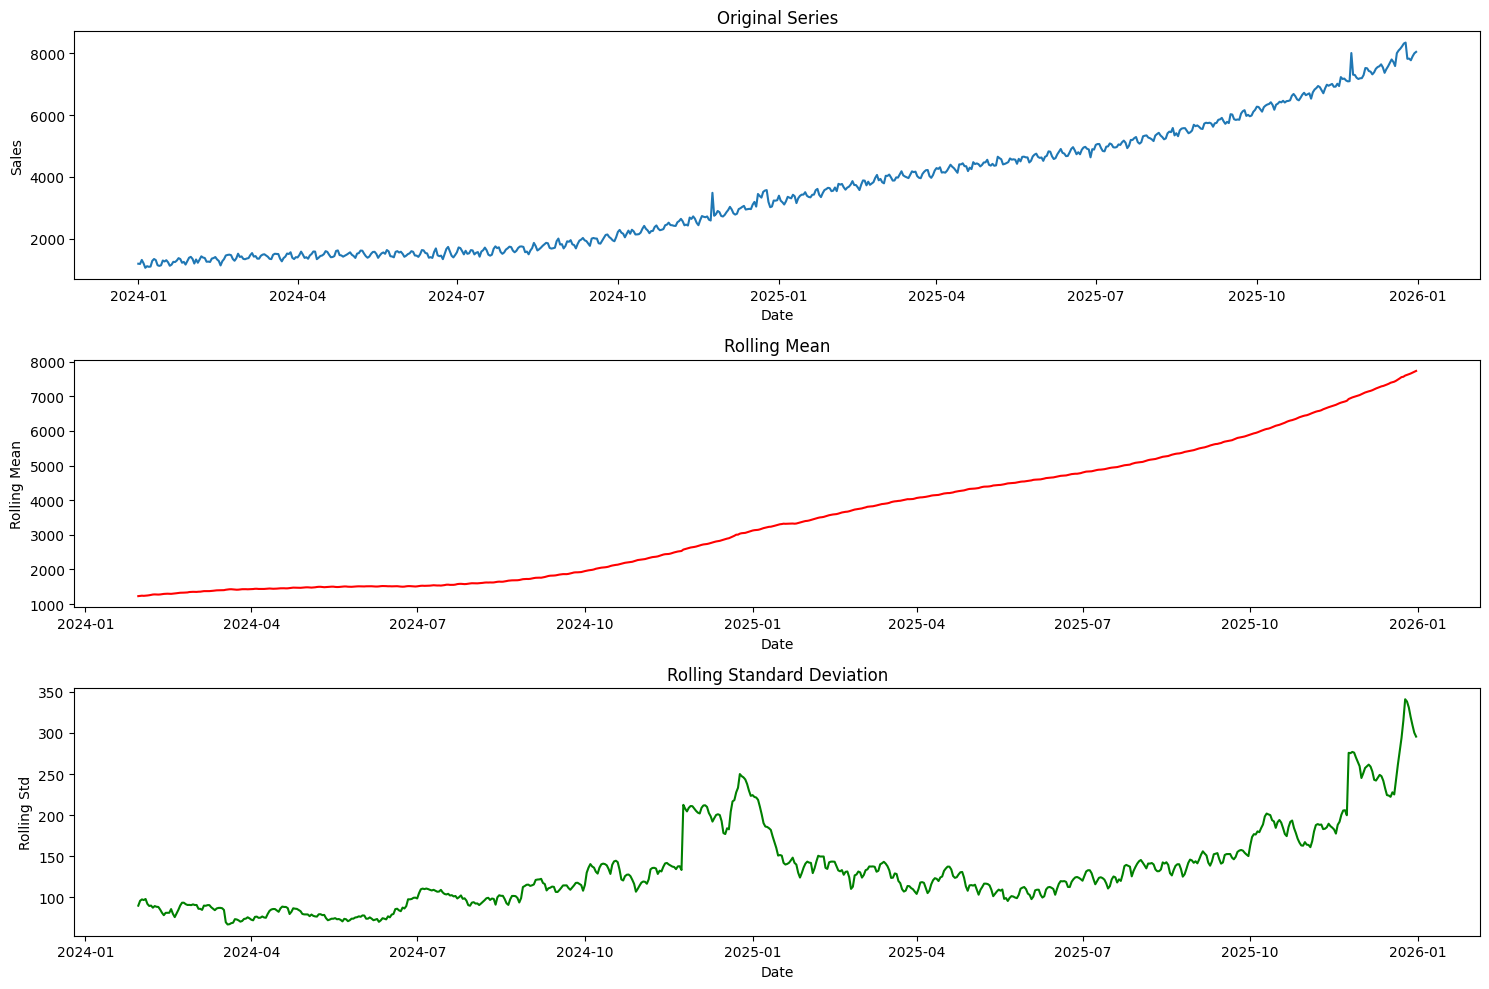

The mean increases over time, suggesting the series is not stationary
 For the first part of 2024 the variance stays in a relatively tight band, spiking near the end of the year.  Then again it stays relatively stable in the first part of 2025, before increasing going into year end. Overally the series is not stationary
First 6 Months
Mean:1417.7217886495957
Std:131.02707195516896
Last 6 Months
Mean:6265.28439864651
Std:936.3660926200268
The mean and standard deviation increased from the first 6 months to the last

----------------------------------------------------------------------
B3: Autocorrelation Function
----------------------------------------------------------------------


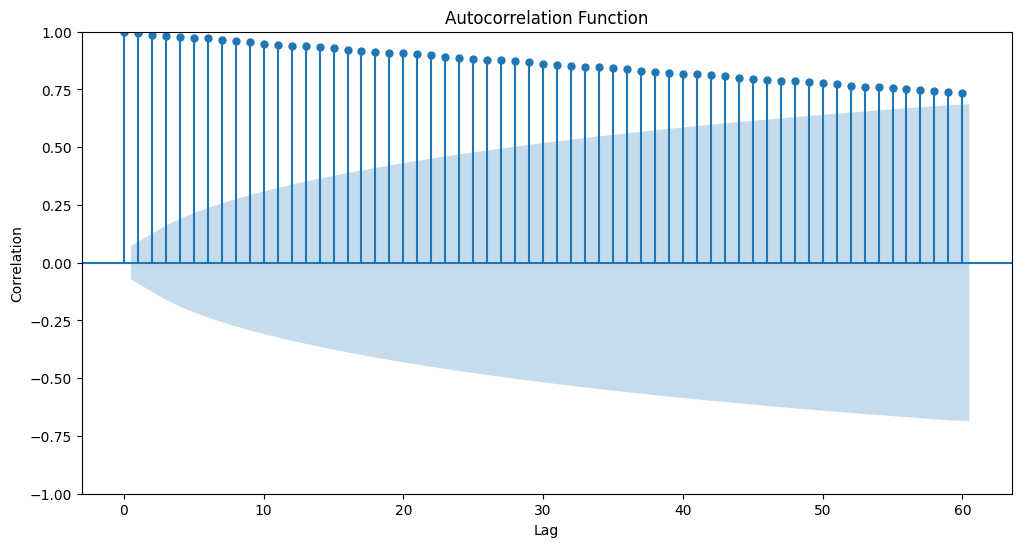

Lag 1: 0.9982879621763532
Lag 7: 0.9981533860874777
Lag 30: 0.9955291195278809
Yes, there is strong weekly autocorrelation
The autocorrelation remains high even with a 30 day lag

----------------------------------------------------------------------
B4: STL Decomposition
----------------------------------------------------------------------


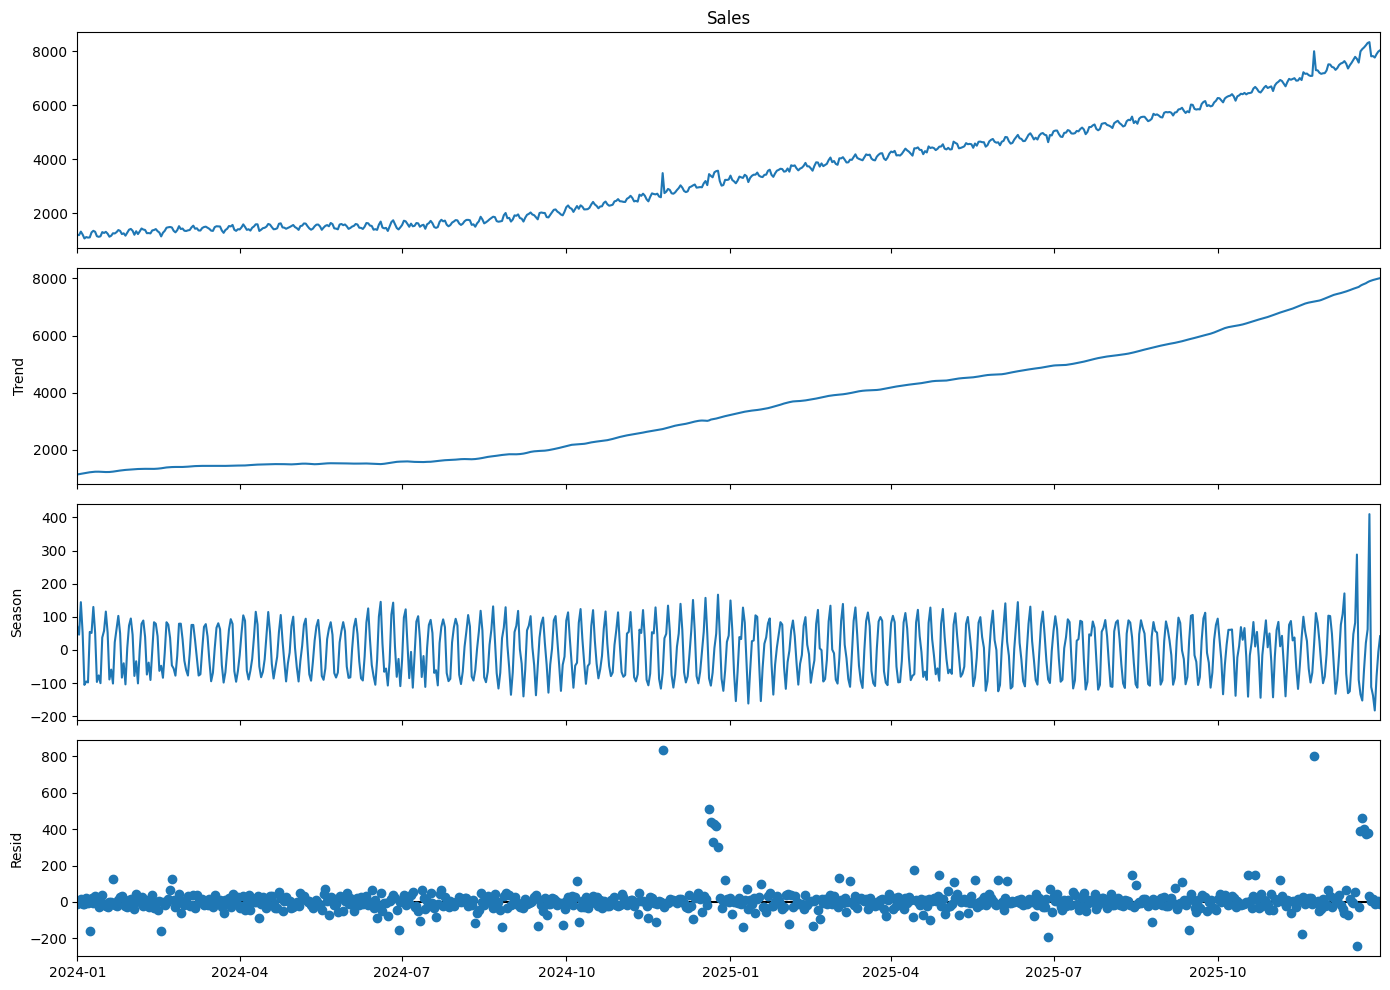

Trend Pattern: The trend pattern is upward over the 2 years of availabe sales data
Weekly Seasonal Pattern: There are consistent fluctuation in sales on a weekly basis
Special Events visible in remainder: You can see spiked in residual near the end of each year likely corresponding with Black Friday and Christmas

----------------------------------------------------------------------
B5: Remainder Analysis
----------------------------------------------------------------------


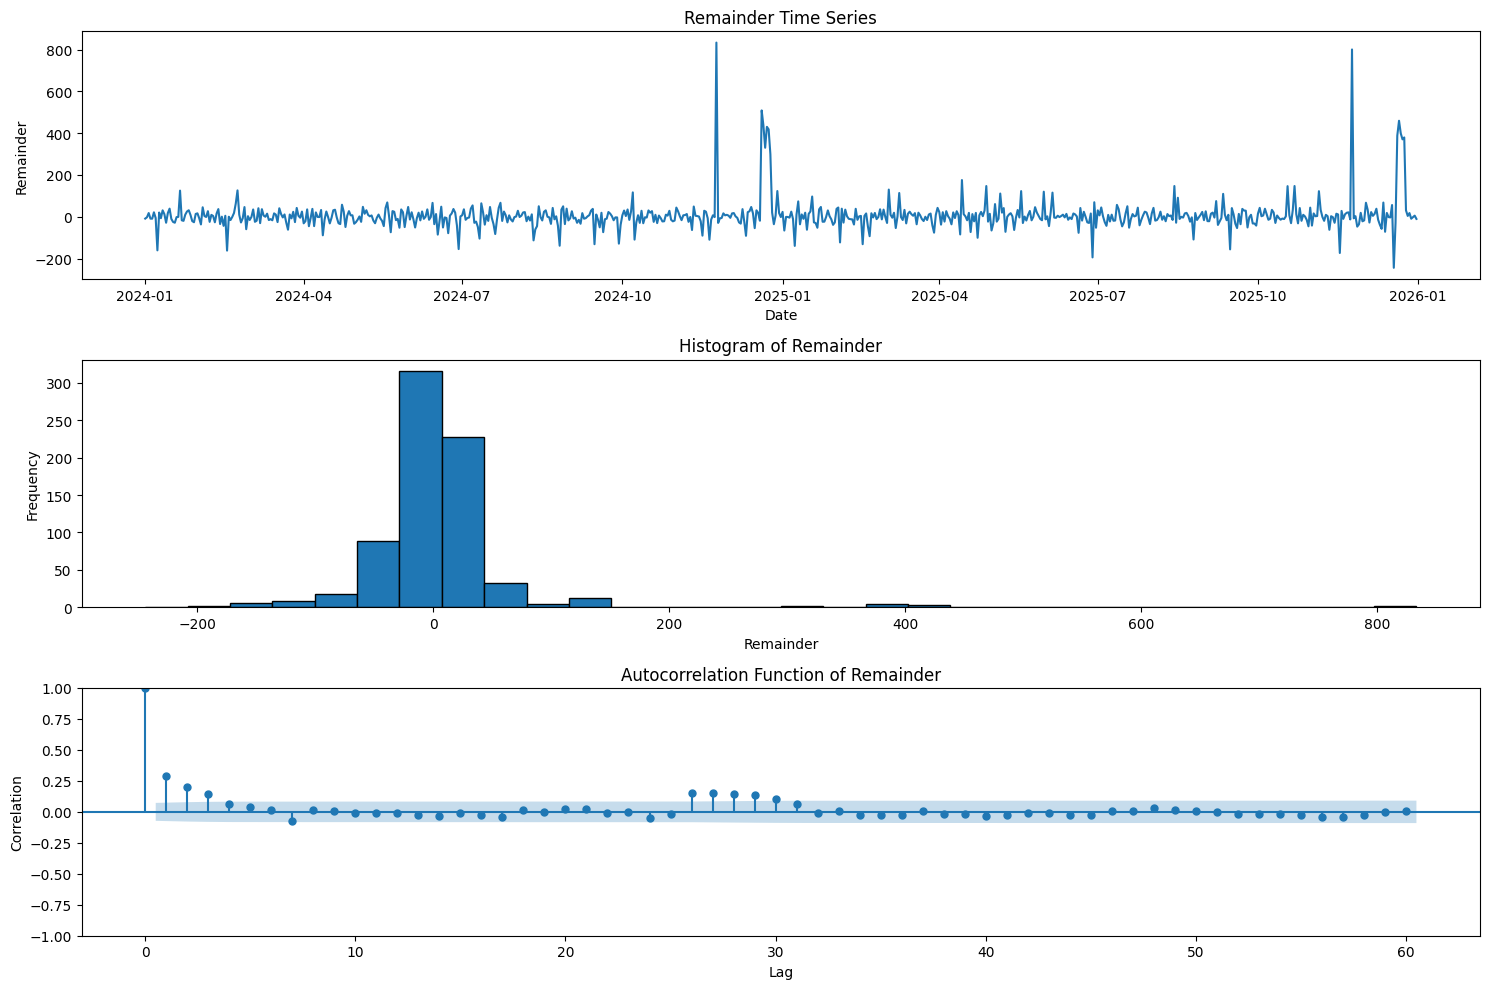

Mean of remainder: 6.99
Standard Deviation of remainder: 77.40
Normality Test: The remainder does not appear bell-shaped and can't be assumed to be normally distributed

Outlier Detection
Outliers: Date
2024-11-24    833.365382
2024-12-20    508.828632
2024-12-21    436.744703
2024-12-22    330.182563
2024-12-23    430.247381
2024-12-24    418.373896
2024-12-25    299.200777
2025-11-24    800.466757
2025-12-18   -244.273267
2025-12-20    387.856243
2025-12-21    459.341586
2025-12-22    398.728732
2025-12-23    370.410709
2025-12-24    379.491201
Name: resid, dtype: float64

Outliers for Special Events: Date
2024-12-20    508.828632
2024-12-21    436.744703
2024-12-22    330.182563
2024-12-23    430.247381
2024-12-24    418.373896
2024-12-25    299.200777
2025-12-20    387.856243
2025-12-21    459.341586
2025-12-22    398.728732
2025-12-23    370.410709
2025-12-24    379.491201
Name: resid, dtype: float64


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit, Probit, Poisson
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("=" * 70)
print("ECON 5140 - HOMEWORK 1")
print("Part A: Generalized Linear Models")
print("Part B: Time Series Decomposition")
print("=" * 70)

# ====================================================================
# DATASET 1: CUSTOMER PURCHASE DATA (for GLM analysis)
# ====================================================================
print("\n" + "=" * 70)
print("DATASET 1: Customer Purchase Behavior")
print("=" * 70)

n_customers = 1000

# Generate customer features
age = np.random.normal(35, 10, n_customers)
income = np.random.normal(50, 15, n_customers)  # in thousands
time_on_site = np.random.gamma(2, 3, n_customers)  # in minutes

# True relationship (latent variable)
z = -3 + 0.05*age + 0.04*income + 0.15*time_on_site + np.random.normal(0, 1, n_customers)

# Generate binary outcome (Purchase: 1=Yes, 0=No)
purchase = (z > 0).astype(int)

# Create DataFrame
df_customers = pd.DataFrame({
    'Age': age,
    'Income': income,
    'TimeOnSite': time_on_site,
    'Purchase': purchase
})

print(f"Number of customers: {len(df_customers)}")
print(f"Purchase rate: {df_customers['Purchase'].mean():.2%}")
print(f"\nFirst 5 rows:")
print(df_customers.head())

# ====================================================================
# DATASET 2: E-COMMERCE SALES TIME SERIES
# ====================================================================
print("\n" + "=" * 70)
print("DATASET 2: E-commerce Daily Sales")
print("=" * 70)

# Create 2 years of daily data
dates = pd.date_range('2024-01-01', '2025-12-31', freq='D')
n_days = len(dates)
t = np.arange(n_days)

# Components
trend = 1000 + 2*t + 0.01*t**2
yearly_seasonal = 200 * np.sin(2*np.pi*t/365) + 150 * np.cos(2*np.pi*t/365)
weekly_seasonal = 100 * np.sin(2*np.pi*t/7)

# Special events
special_events = np.zeros(n_days)
for year in [2024, 2025]:
    # Black Friday
    bf_date = pd.Timestamp(f'{year}-11-24')
    bf_idx = (dates == bf_date)
    special_events[bf_idx] = 800

    # Christmas
    xmas_idx = (dates >= f'{year}-12-20') & (dates <= f'{year}-12-25')
    special_events[xmas_idx] = 400

# Random noise
noise = np.random.normal(0, 50, n_days)

# Combine components
sales = trend + yearly_seasonal + weekly_seasonal + special_events + noise
sales = np.maximum(sales, 0)

# Create DataFrame
df_sales = pd.DataFrame({
    'Date': dates,
    'Sales': sales,
    'DayOfWeek': dates.dayofweek,
    'Month': dates.month,
    'IsWeekend': dates.dayofweek >= 5
})
df_sales.set_index('Date', inplace=True)

print(f"Date range: {df_sales.index[0].date()} to {df_sales.index[-1].date()}")
print(f"Number of days: {len(df_sales)}")
print(f"\nSales Statistics:")
print(df_sales['Sales'].describe())

# ====================================================================
# PART A: GENERALIZED LINEAR MODELS
# ====================================================================
print("\n" + "=" * 70)
print("PART A: GENERALIZED LINEAR MODELS")
print("=" * 70)

# --------------------------------------------------------------------
# A1: Exploratory Data Analysis (GLM)
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A1: Exploratory Data Analysis")
print("-" * 70)

# YOUR CODE:
# 1. Create box plots comparing Age, Income, and TimeOnSite
#    between purchasers and non-purchasers
#    - Use 3 subplots (1 row, 3 columns)
import seaborn as sns

fig, axes = plt.subplots(1,3, figsize = (18,6))

sns.boxplot(x='Purchase', y='Age', data=df_customers, ax=axes[0])
axes[0].set_title('Purchases by Age')
axes[0].set_xlabel('Purchase (1=Yes, 0=No)')
axes[0].set_ylabel('Age')

sns.boxplot(x='Purchase', y='Income', data=df_customers, ax=axes[1])
axes[1].set_title('Purchases by Income')
axes[1].set_xlabel('Purchase (1=Yes, 0=No)')
axes[1].set_ylabel('Income (Thousands of $)')

sns.boxplot(x='Purchase', y='TimeOnSite', data=df_customers, ax=axes[2])
axes[2].set_title('Purchases by TimeOnSite')
axes[2].set_xlabel('Purchase (1=Yes, 0=No)')
axes[2].set_ylabel('Time on Site (Minutes)')

plt.tight_layout()
plt.show()
#
# 2. Calculate and print mean values for each group:
#    - Mean Age: Purchasers vs Non-purchasers
#    - Mean Income: Purchasers vs Non-purchasers
#    - Mean TimeOnSite: Purchasers vs Non-purchasers
print("Mean Values")
print(df_customers.groupby('Purchase')[['Age', 'Income', 'TimeOnSite']].mean())
#
#
#
# 3. Create a correlation matrix heatmap for the features
print("Correlation Matrix")
corr_matrix = df_customers[['Age','Income','TimeOnSite', 'Purchase']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# --------------------------------------------------------------------
# A2: Linear Probability Model (LPM)
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A2: Linear Probability Model")
print("-" * 70)

# YOUR CODE:
# 1. Fit OLS model: Purchase ~ Age + Income + TimeOnSite
#    - Add constant using sm.add_constant()
#    - Use sm.OLS()
X_ols = sm.add_constant(df_customers[['Age', 'Income', 'TimeOnSite']])
ols_model = sm.OLS(df_customers['Purchase'], X_ols).fit()

#
# 2. Print regression summary
print(ols_model.summary())
#
# 3. Calculate predicted probabilities
#    - Count how many predictions are outside [0, 1]
#    - Print the percentage of invalid predictions
ols_predictions = ols_model.predict(X_ols)
invalid_predictions = np.sum((ols_predictions < 0) | (ols_predictions > 1))
percentage_invalid = invalid_predictions / len(ols_predictions) * 100
print(f"Percentage of Invalid Predictions: {percentage_invalid:.2f}%")

#
# 4. Create histogram of predicted probabilities
#    - Mark the [0, 1] boundaries with vertical lines
plt.figure(figsize=(8, 6))
plt.hist(ols_predictions, bins=30, edgecolor='black', alpha=0.6)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=1, color='red', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities from LPM')
plt.show()
# --------------------------------------------------------------------
# A3: Logistic Regression
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A3: Logistic Regression")
print("-" * 70)

# YOUR CODE:
# 1. Fit logistic regression: sm.Logit()
X_logit = sm.add_constant(df_customers[['Age', 'Income', 'TimeOnSite']])
logit_model = sm.Logit(df_customers['Purchase'], X_logit).fit()

#
#
# 2. Print summary and extract:
print("Logistic Regression Summary")
print(logit_model.summary())
#    - Coefficients
coefficients = logit_model.params
print("Coefficients")
print(coefficients)
#    - Odds ratios: np.exp(coefficients)
odds_ratios = np.exp(coefficients)
print("Odds Ratios")
print(odds_ratios)
#    - p-values
p_values = logit_model.pvalues
print("p-values")
print(p_values)

#
# 3. Interpret each coefficient:
#    - Age: Effect on log-odds
print("\nInterpretations")
print("A 1 year increase in age carries a constant of .103 which corresponds to a 1.11x increase in odds of purchase from the prior age, the P-value is also very low showing strong statistical significance")
#    - Income: Effect on log-odds
print("A $1000 increase in income carries a constant of .075 which corresponds to a 1.07x increase in odds of purchase from the prior income, the P-value is also very low showing strong statistical significance")
#
#    - TimeOnSite: Effect on log-odds
print("A 1 minute increase in browsing time carries a constant of .269 which corresponds to a 1.31x increase in odds of purchase from the last browsing time, with a P-Value that is low showing strong statistical significance")
#
# 4. Calculate predicted probabilities
logistic_predictions = logit_model.predict(X_logit)
#
#    - Verify all are in [0, 1]
min = logistic_predictions.min()
max = logistic_predictions.max()
if min <0 or max >1:
  print("Predicted probabilities outside of [0,1]")
else:
  print("Predicted probabilities within [0,1]")
#    - Create histogram
plt.figure(figsize=(8, 6))
plt.hist(logistic_predictions, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities from Logistic Regression')
plt.show()


# --------------------------------------------------------------------
# A4: Prediction for New Customers
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A4: Predictions for New Customers")
print("-" * 70)

# New customers
new_customers = pd.DataFrame({
    'Age': [25, 35, 45, 55],
    'Income': [30, 50, 70, 90],
    'TimeOnSite': [2, 5, 8, 10]
})


# YOUR CODE:
# 1. Use your logistic model to predict purchase probability
#    for each new customer
New_Customers = sm.add_constant(new_customers)
new_predictions = logit_model.predict(New_Customers)

# 2. Create a nice formatted table showing:
newpredictions_df = New_Customers.copy()
newpredictions_df['Predicted Probability'] = new_predictions
newpredictions_df['Predicted Purchase'] = (new_predictions > 0.5).astype(int)

print("New Customer Predictions")
print(newpredictions_df.to_string(index=False))
#    - Customer features
#    - Predicted probability
#    - Classification (Purchase = 1 if p > 0.5)


# 3. Which customer is most likely to purchase? Why?
print("The most likely customer to purchase is the 55 year old with an income of 90 and a time on sight of 10.  They have the highest of each attributes which we showed to all be positive for purchases in the previous regression analysis")

# ====================================================================
# PART B: TIME SERIES ANALYSIS
# ====================================================================
print("\n" + "=" * 70)
print("PART B: TIME SERIES ANALYSIS")
print("=" * 70)

# --------------------------------------------------------------------
# B1: Time Series Visualization
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B1: Time Series Visualization")
print("-" * 70)

# YOUR CODE:
# 1. Create time series plot of daily sales
#    - Full 2-year series
#    - Label axes appropriately
ax1 = df_sales['Sales'].plot()
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
plt.show()

# 2. Create seasonal subseries plots:
#    - Box plot: Sales by day of week
sns.boxplot(x='DayOfWeek', y='Sales', data=df_sales)
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()
#    - Box plot: Sales by month
sns.boxplot(x='Month', y='Sales', data=df_sales)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# 3. Calculate and print:
#    - Mean sales by day of week
Weekly_Mean = df_sales.groupby('DayOfWeek')['Sales'].mean()

print(f"Mean Sales by Day of Week: {Weekly_Mean}")
#    - Mean sales by month
Monthly_Mean = df_sales.groupby('Month')['Sales'].mean()
print(f"Mean Sales by Month: {Monthly_Mean}")




# 4. What patterns do you observe?
print("In this data set you can see sales growing over time on a 2 year basis.  On a monthly basis you see higher sales near the end of the year, but during the week you see that sales are about the same day-to-day")

# --------------------------------------------------------------------
# B2: Stationarity Assessment
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B2: Stationarity Check")
print("-" * 70)

# YOUR CODE:
# 1. Create a plot with 3 subplots:
#    - Original series
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
axes[0].plot(df_sales['Sales'])
axes[0].set_title('Original Series')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sales')
#    - Rolling mean (30-day window)
rolling_mean = df_sales['Sales'].rolling(window=30).mean()
axes[1].plot(rolling_mean, color='red')
axes[1].set_title('Rolling Mean')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Rolling Mean')
#    - Rolling std (30-day window)
rolling_std = df_sales['Sales'].rolling(window=30).std()
axes[2].plot(rolling_std, color='green')
axes[2].set_title('Rolling Standard Deviation')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Rolling Std')
plt.tight_layout()
plt.show()

# 2. Is the series stationary? Justify based on:
#    - Does mean change over time?
print("The mean increases over time, suggesting the series is not stationary")
#    - Does variance change over time?
print(" For the first part of 2024 the variance stays in a relatively tight band, spiking near the end of the year.  Then again it stays relatively stable in the first part of 2025, before increasing going into year end. Overally the series is not stationary")

# 3. Compare first 6 months vs last 6 months:
#    - Calculate mean and std for each period
first_6_months = df_sales['2024-01-01':'2024-06-30']
last_6_months = df_sales['2025-07-01':'2025-12-31']
first_6_months_mean = first_6_months['Sales'].mean()
first_6_months_std = first_6_months['Sales'].std()
last_6_months_mean = last_6_months['Sales'].mean()
last_6_months_std = last_6_months['Sales'].std()
#
#    - Print comparison
print("First 6 Months")
print(f"Mean:{first_6_months_mean}")
print(f"Std:{first_6_months_std}")
print("Last 6 Months")
print(f"Mean:{last_6_months_mean}")
print(f"Std:{last_6_months_std}")

print("The mean and standard deviation increased from the first 6 months to the last")
# --------------------------------------------------------------------
# B3: Autocorrelation Analysis
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B3: Autocorrelation Function")
print("-" * 70)

# YOUR CODE:
# 1. Plot ACF for up to 60 lags
#    - Use plot_acf from statsmodels
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
plot_acf(df_sales['Sales'], lags=60, ax=axes, alpha=0.05)
axes.set_title('Autocorrelation Function')
axes.set_xlabel('Lag')
axes.set_ylabel('Correlation')
plt.show()

# 2. Calculate specific autocorrelations manually:
#    - Lag 1 (yesterday)
lag_1 = np.corrcoef(df_sales['Sales'][:-1], df_sales['Sales'][1:])[0,1]
print(f"Lag 1: {lag_1}")
#
#    - Lag 7 (last week)
lag_7 = np.corrcoef(df_sales['Sales'][:-7], df_sales['Sales'][7:])[0,1]
print(f"Lag 7: {lag_7}")
#
#    - Lag 30 (last month)
lag_30 = np.corrcoef(df_sales['Sales'][:-30], df_sales['Sales'][30:])[0,1]
print(f"Lag 30: {lag_30}")
#
#    Use: np.corrcoef(sales[:-lag], sales[lag:])[0,1]



# 3. Interpret:
#    - Do you see weekly patterns?
print("Yes, there is strong weekly autocorrelation")
#    - How persistent is the autocorrelation?
print("The autocorrelation remains high even with a 30 day lag")

# --------------------------------------------------------------------
# B4: STL Decomposition
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B4: STL Decomposition")
print("-" * 70)

# YOUR CODE:
# 1. Apply STL decomposition with weekly seasonality:
#    stl = STL(df_sales['Sales'], seasonal=7, robust=True)
#    result = stl.fit()
stl = STL(df_sales['Sales'], seasonal=7, robust=True)
result = stl.fit()

#

# 2. Plot all four components:
#    - Observed
#    - Trend
#    - Seasonal (weekly pattern)
#    - Remainder
fig = result.plot()
fig.set_size_inches(14, 10)
plt.tight_layout()
plt.show()

# 3. Analyze each component:
#    - What is the trend pattern?
print("Trend Pattern: The trend pattern is upward over the 2 years of availabe sales data")
#    - What is the weekly seasonal pattern?
print("Weekly Seasonal Pattern: There are consistent fluctuation in sales on a weekly basis")
#    - Are special events visible in remainder?
print("Special Events visible in remainder: You can see spiked in residual near the end of each year likely corresponding with Black Friday and Christmas")

# --------------------------------------------------------------------
# B5: Remainder Diagnostics
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B5: Remainder Analysis")
print("-" * 70)

# YOUR CODE:
# 1. Extract remainder from STL
remainder = result.resid

#

# 2. Create diagnostic plots:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
axes[0].plot(remainder)
axes[0].set_title('Remainder Time Series')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Remainder')
#    - Histogram of remainder
axes[1].hist(remainder.dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('Remainder')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Remainder')
#    - ACF of remainder
plot_acf(remainder.dropna(), lags=60, ax=axes[2], alpha=0.05)
axes[2].set_title('Autocorrelation Function of Remainder')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Correlation')

plt.tight_layout()
plt.show()
#

# 3. Statistical tests:
#    - Mean (should be ≈ 0)
print(f"Mean of remainder: {remainder.mean():.2f}")
#
#    - Standard deviation
print(f"Standard Deviation of remainder: {remainder.std():.2f}")
#    - Check normality
print("Normality Test: The remainder does not appear bell-shaped and can't be assumed to be normally distributed")
#

# 4. Identify outliers:
#    - Find days where |remainder| > 3×std
remainder_std = remainder.std()
outliers = remainder[np.abs(remainder) > 3 * remainder_std]

print(f"\nOutlier Detection")
if len(outliers) > 0:
      print(f"Outliers: {outliers}")
else:
      print("No outliers found")
#
#    - Print dates and investigate
#    - Are Black Friday and Christmas visible?
Black_Friday_2024 = pd.to_datetime('2024-11-29')
Black_Friday_2025 = pd.to_datetime('2025-11-28')

Christmas_2024_start = pd.to_datetime('2024-12-20')
Christmas_2024_end = pd.to_datetime('2024-12-25')
Christmas_2025_start = pd.to_datetime('2025-12-20')
Christmas_2025_end = pd.to_datetime('2025-12-25')


christmas_dates = pd.DatetimeIndex([])
christmas_dates = christmas_dates.append(pd.date_range(Christmas_2024_start, Christmas_2024_end))
christmas_dates = christmas_dates.append(pd.date_range(Christmas_2025_start, Christmas_2025_end))

special_event_dates = [Black_Friday_2024, Black_Friday_2025] + christmas_dates.tolist()


Outlier_Special_Events = outliers[outliers.index.isin(special_event_dates)]

print(f"\nOutliers for Special Events: {Outlier_Special_Events}")
